Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import math


from sklearn.decomposition import PCA
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# === Dataset Loading and Exploration ===
    Loads the main dataset (`dataset.npz`) containing X-ray images and their corresponding labels.
    Each image is 20×20 pixels, and the labels represent the detected gift type.
    The pixel values are normalized to the [0, 1] range for consistency across models.
    A few example images are displayed to verify correct loading and label mapping.
    80/20 train-test split to preserve the class distribution for later classification tasks.

X shape: (13067, 400)
y shape: (13067,)


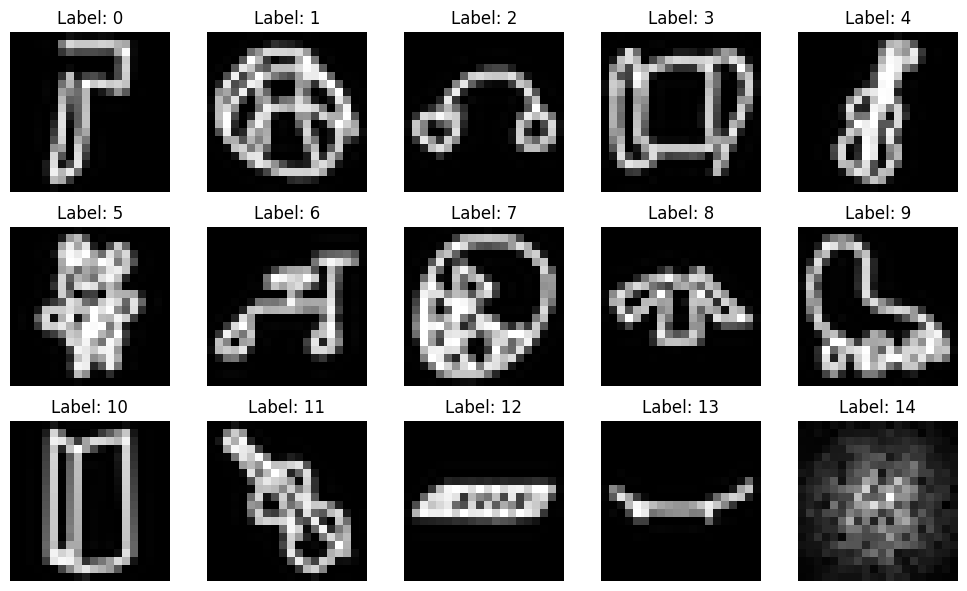

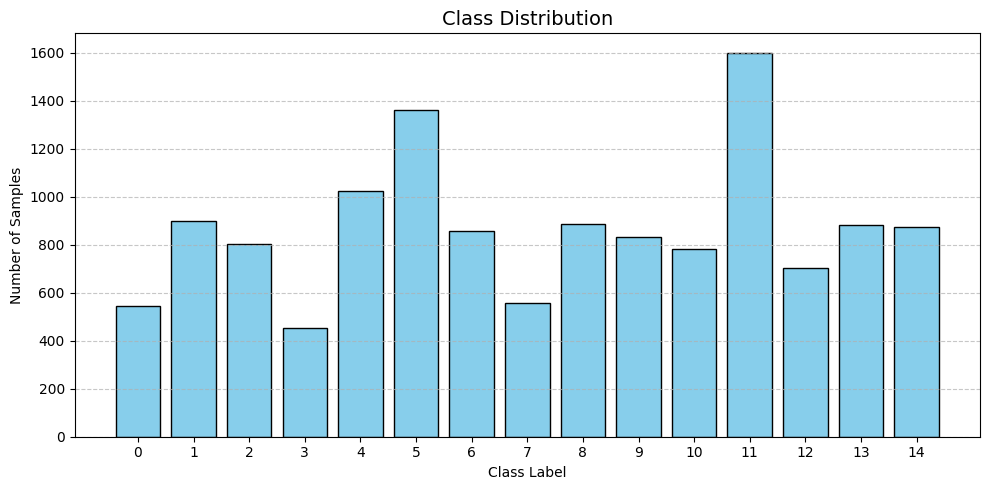

In [3]:
data = np.load("dataset.npz")
X, y = data["X"], data["y"]

print("X shape:", X.shape)
print("y shape:", y.shape)
X = X / 255.0
unique_labels = np.unique(y)

fig, axes = plt.subplots(3, 5, figsize=(10, 6))

for i, label in enumerate(unique_labels):
    idx = np.where(y == label)[0][0]
    ax = axes.flat[i]
    ax.imshow(X[idx].reshape(20, 20), cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.tight_layout()
plt.show()

class_counts = Counter(y)
labels = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color="skyblue", edgecolor="black")
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks(labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Problem 1: Classification ===
    This section trains two supervised models on the clean dataset:
        - Logistic Regression
        - SVM with RBF kernel
    Normalization to [0, 1] is already applied on all images.
    Accuracy and confusion matrices are used for evaluation.

Note: A convergence warning occurs during Logistic Regression training, suggesting that the model might improve slightly with more iterations, but the training time would become unreasonably long.


===== Logistic Regression =====
Best parameters: {'C': 0.1, 'penalty': 'l2'}
CV Accuracy: 0.7042002750452496
Test Accuracy: 0.6951032899770466
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       109
           1       0.52      0.56      0.54       180
           2       0.85      0.84      0.85       161
           3       0.37      0.24      0.29        91
           4       0.62      0.60      0.61       204
           5       0.76      0.79      0.77       273
           6       0.76      0.76      0.76       172
           7       0.49      0.32      0.38       111
           8       0.75      0.80      0.77       178
           9       0.80      0.77      0.78       167
          10       0.59      0.61      0.60       156
          11       0.64      0.68      0.66       320
          12       0.50      0.54      0.52       140
          13       0.74      0.85      0.79       177
          14       0.98      1.00      0.99  

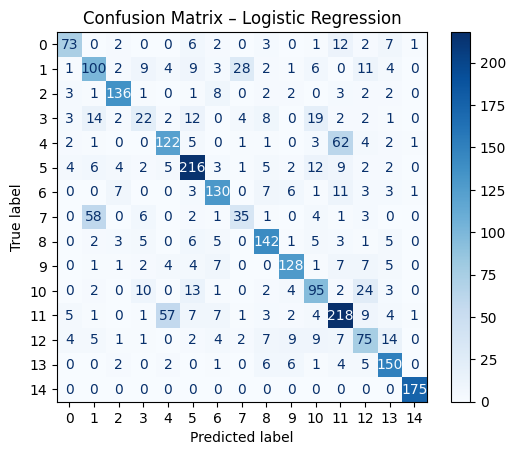

In [70]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, solver='saga', random_state= 42), param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

print("\n===== Logistic Regression =====")
print("Best parameters:", grid_lr.best_params_)
print("CV Accuracy:", grid_lr.best_score_)

y_pred_lr = best_lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


===== SVM =====
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
CV Accuracy: 0.786952237774559
Test Accuracy: 0.7872991583779648
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.64      0.71      0.67       180
           2       0.92      0.88      0.90       161
           3       0.64      0.54      0.58        91
           4       0.60      0.58      0.59       204
           5       0.87      0.87      0.87       273
           6       0.87      0.90      0.88       172
           7       0.64      0.44      0.52       111
           8       0.91      0.88      0.89       178
           9       0.84      0.84      0.84       167
          10       0.78      0.83      0.80       156
          11       0.67      0.71      0.69       320
          12       0.72      0.75      0.73       140
          13       0.85      0.88      0.86       177
          14       1.00      1.00      1.00  

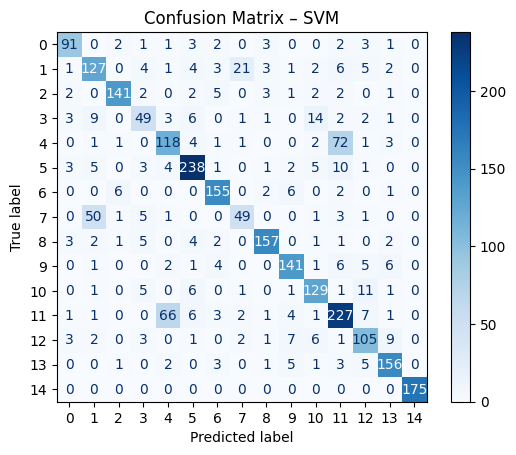

In [5]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_


print("\n===== SVM =====")
print("Best parameters:", grid_svm.best_params_)
print("CV Accuracy:", grid_svm.best_score_)

y_pred_svm = best_svm.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix – SVM")
plt.show()

In [72]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression – test accuracy: {accuracy_lr:.3f}")
print(f"SVM – test accuracy: {accuracy_svm:.3f}")

Logistic Regression – test accuracy: 0.695
SVM – test accuracy: 0.787


# === Problem 2: PCA Dimensionality Reduction ===
    This section reduce dimensionality with PCA to test how it affects training time and classification accuracy.
    The classifier from Problem 1 is reused on PCA-transformed data with different numbers of components.
    Shows the trade-off between computational cost and performance.

In [24]:
start = time.time()
best_svm.fit(X_train, y_train)
end = time.time()
baseline_time = end - start

y_pred_base = best_svm.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_base)
print(f"Baseline Accuracy: {baseline_acc:.4f}")
print(f"Baseline Training Time: {baseline_time:.4f} s")


k_values = [50, 100, 200, 300]
results = []

for k in k_values:
    print(f"=== PCA with {k} components ===")
    pca=PCA(n_components=k, random_state=42)
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    start = time.time()
    best_svm.fit(X_train_pca, y_train)
    end = time.time()
    train_time = end - start

    y_pred_pca = best_svm.predict(X_test_pca)
    svm_acc = accuracy_score(y_test, y_pred_pca)

    results.append({
        'k' : k,
        'SVM accuracy' : svm_acc,
        'Training time (s)': train_time
    })

table_results = pd.DataFrame(results)
print(table_results)

Baseline Accuracy: 0.7873
Baseline Training Time: 5.2173 s
=== PCA with 50 components ===
=== PCA with 100 components ===
=== PCA with 200 components ===
=== PCA with 300 components ===
     k  SVM accuracy  Training time (s)
0   50      0.802984           2.057947
1  100      0.798393           2.732345
2  200      0.793803           3.932847
3  300      0.792655           5.188629


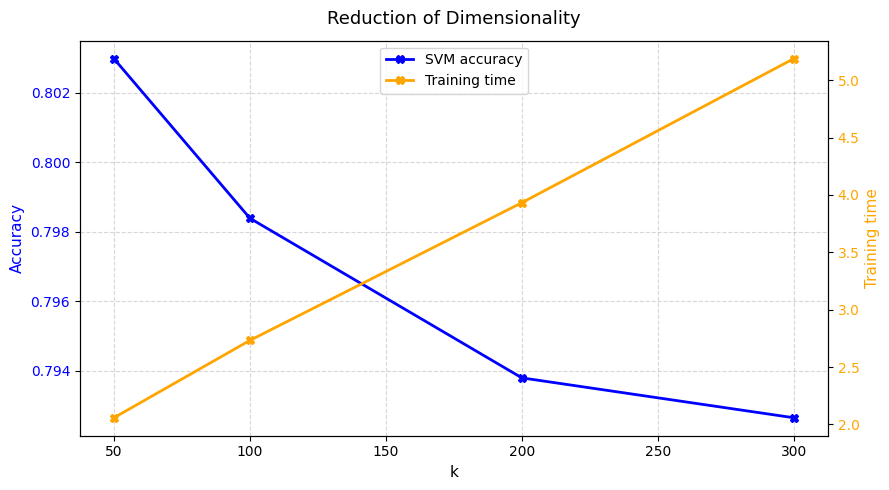

In [34]:

table_results['k'] = pd.to_numeric(table_results['k'], errors='coerce')
table_results = table_results.dropna(subset=['k']).sort_values('k')

k_vals = table_results['k'].values
acc = table_results['SVM accuracy'].values
tt  = table_results['Training time (s)'].values

plt.figure(figsize=(9, 5))
ax1 = plt.gca()

ax1.plot(k_vals, acc, marker='X', linewidth=2, color='blue', label='SVM accuracy')
ax1.set_xlabel('k', fontsize=11)
ax1.set_ylabel('Accuracy', color='blue', fontsize=11)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(k_vals, tt,marker='X', linewidth=2, color='orange', label='Training time')
ax2.set_ylabel('Training time', color='orange', fontsize=11)
ax2.tick_params(axis='y', labelcolor='orange')


plt.title('Reduction of Dimensionality', fontsize=13, pad=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', frameon=True)

plt.tight_layout()
plt.show()

# === Problem 3: Detecting Corrupted Images ===
    In this section, the goal is to identify corrupted images within the provided unlabeled dataset.
    Changed the name of the first dataset to preserve structure and avoid confusion.
    Scaling is done here because there are two different datasets.
    From the assignment, we know that dataset_corrupted contains 405 images without labels, and 89 of them are corrupted. This is used as the basis for the threshold.

In [13]:
X_clean_test, y_clean_test = X_test, y_test
X_clean_train, y_clean_train = X_train, y_train

data = np.load("dataset_corrupted.npz")
X_corrupted= data["X"]/255.0
print("X shape:", X_corrupted.shape)

scaler = StandardScaler()
X_clean_train_scaled = scaler.fit_transform(X_clean_train)
X_clean_test_scaled = scaler.transform(X_clean_test)
X_corrupted_scaled = scaler.transform(X_corrupted)

X shape: (405, 400)


In [14]:
pca = PCA(n_components=50, random_state=42)
pca.fit(X_clean_train_scaled)

X_train_pca = pca.transform(X_clean_train_scaled)
X_test_pca = pca.transform(X_clean_test_scaled)
X_corrupted_pca = pca.transform(X_corrupted_scaled)

svm_corr = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
svm_corr.fit(X_train_pca, y_clean_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


=== PCA threshold ===

In [15]:
X_proj = pca.inverse_transform(pca.transform(X_corrupted))
recon_pca = np.mean((X_corrupted_scaled - X_proj) ** 2, axis=1)

threshold_pca = np.percentile(recon_pca, 78)
flag_recon = recon_pca > threshold_pca

print(f"Threshold by PCA only : {threshold_pca:.4f}")
print(f"Flagged by PCA only: {flag_recon.sum()} / {len(flag_recon)}")

flag_pca = recon_pca > threshold_pca


Threshold by PCA only : 7.0330
Flagged by PCA only: 89 / 405


In [16]:
def visualize_flags(flag_mask, datasetX, img_shape=(20, 20), show_not_flagged=False, cols=10):
    """
    Displays flagged and optionally unflagged images.

    Parameters:
    flag_mask: np.ndarray, Boolean array where True indicates a flagged image
    datasetX: np.ndarray, Image data normalized between 0 and 1
    img_shape: tuple, The shape each image is reshaped to for display
    show_not_flagged: bool, If True, also displays images that were not flagged
    cols: int, Number of images per row in the plots

    Returns:
    None
    """
    # Flagged
    flagged_indices = np.where(flag_mask)[0]
    rows = math.ceil(len(flagged_indices) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
    axes = axes.flatten()

    for i, idx in enumerate(flagged_indices):
        axes[i].imshow(datasetX[idx].reshape(img_shape), cmap="gray")
        axes[i].set_title(f"Flagged idx: {idx}")
        axes[i].axis("off")

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    fig.suptitle(f"Flagged images ({len(flagged_indices)})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Not flagged
    if show_not_flagged:
        not_flagged_indices = np.where(~flag_mask)[0]
        rows = math.ceil(len(not_flagged_indices) / cols)
        fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
        axes = axes.flatten()

        for i, idx in enumerate(not_flagged_indices):
            axes[i].imshow(datasetX[idx].reshape(img_shape), cmap="gray")
            axes[i].set_title(f"Normal idx: {idx}")
            axes[i].axis("off")

        for j in range(i + 1, len(axes)):
            axes[j].axis("off")

        fig.suptitle(f"Not flagged images ({len(not_flagged_indices)})", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

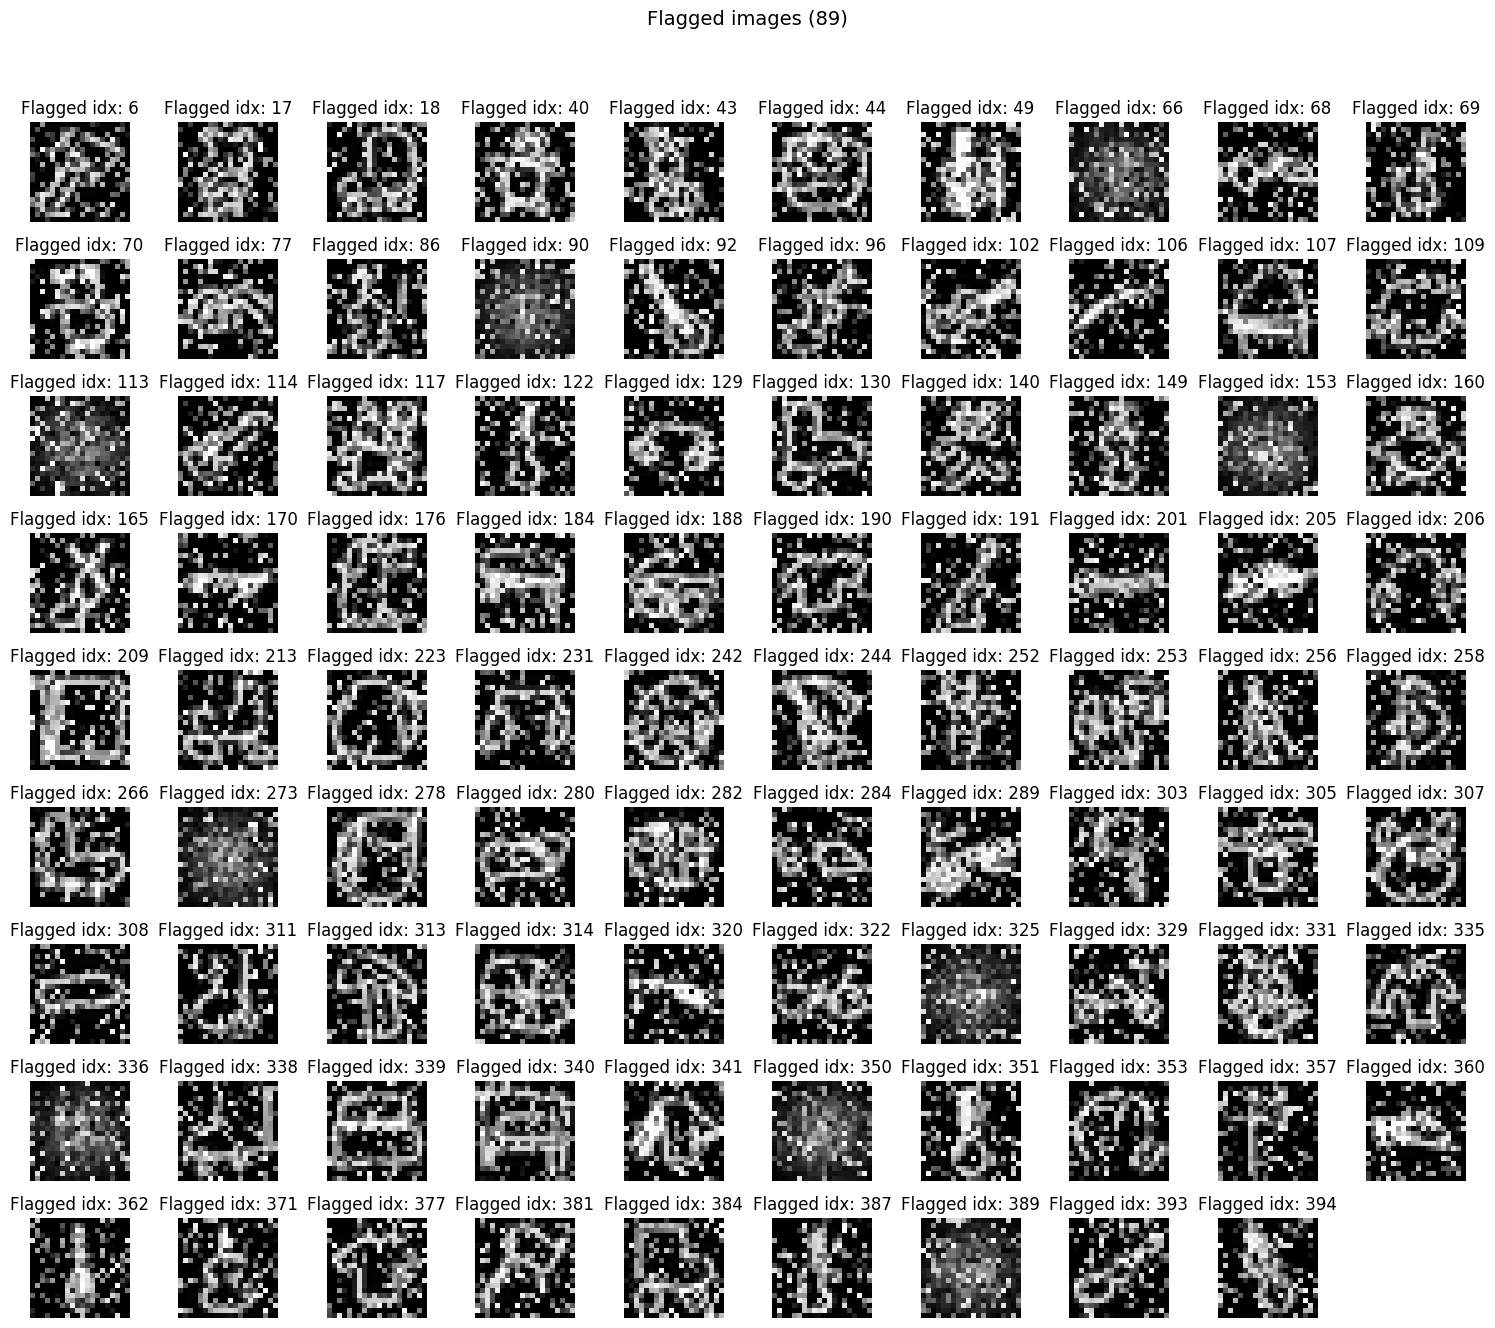

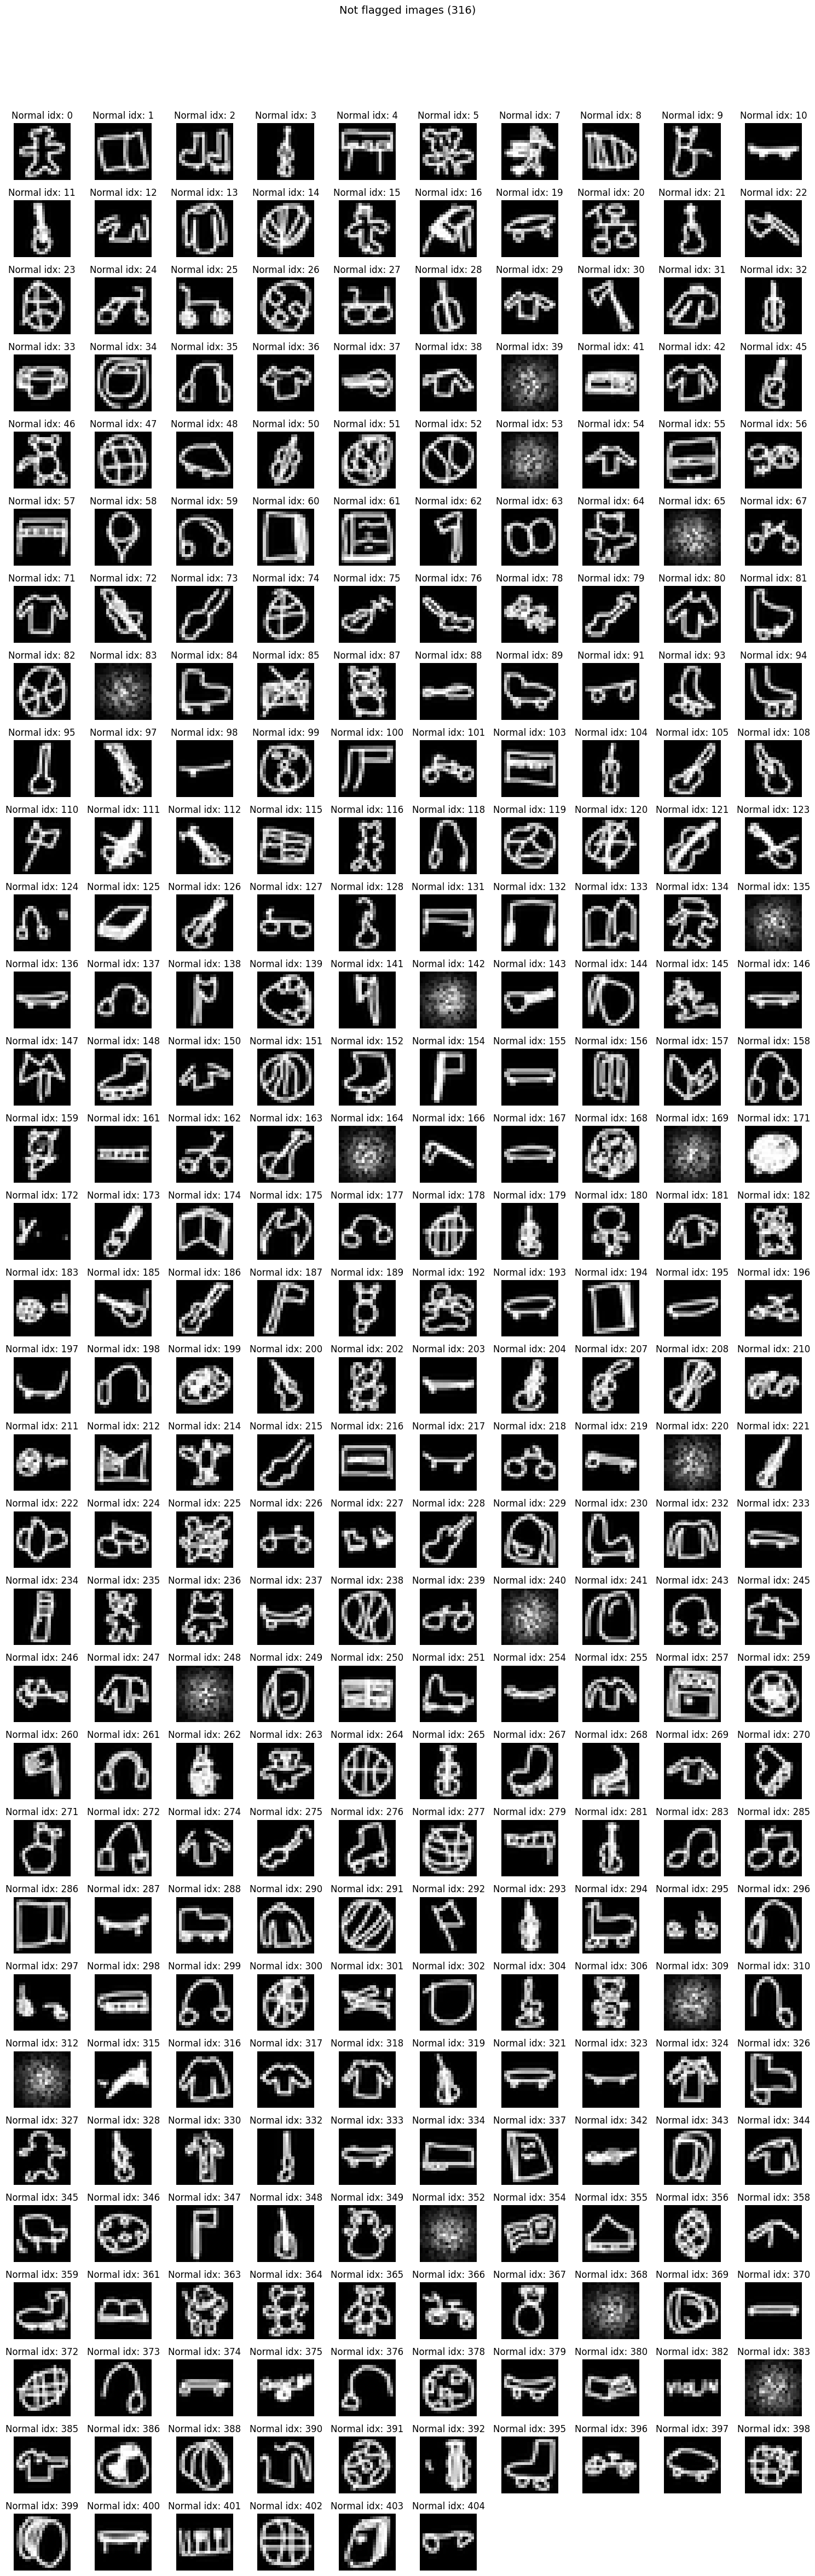

In [17]:
visualize_flags(flag_pca, X_corrupted, show_not_flagged=True)

=== SVM decision function based threshold ===

In [79]:
svm_score_clean = np.max(svm_corr.decision_function(X_test_pca), axis=1)
svm_score_corr  = np.max(svm_corr.decision_function(X_corrupted_pca), axis=1)
threshold_svm = np.percentile(svm_score_clean, 5)
flag_svm = svm_score_corr <= threshold_svm

print(f"Threshold svm: {threshold_svm:.4f}")
print(f"Flagged svm: {flag_svm.sum()} / {len(flag_svm)}")

Threshold svm: 14.3029
Flagged svm: 101 / 405


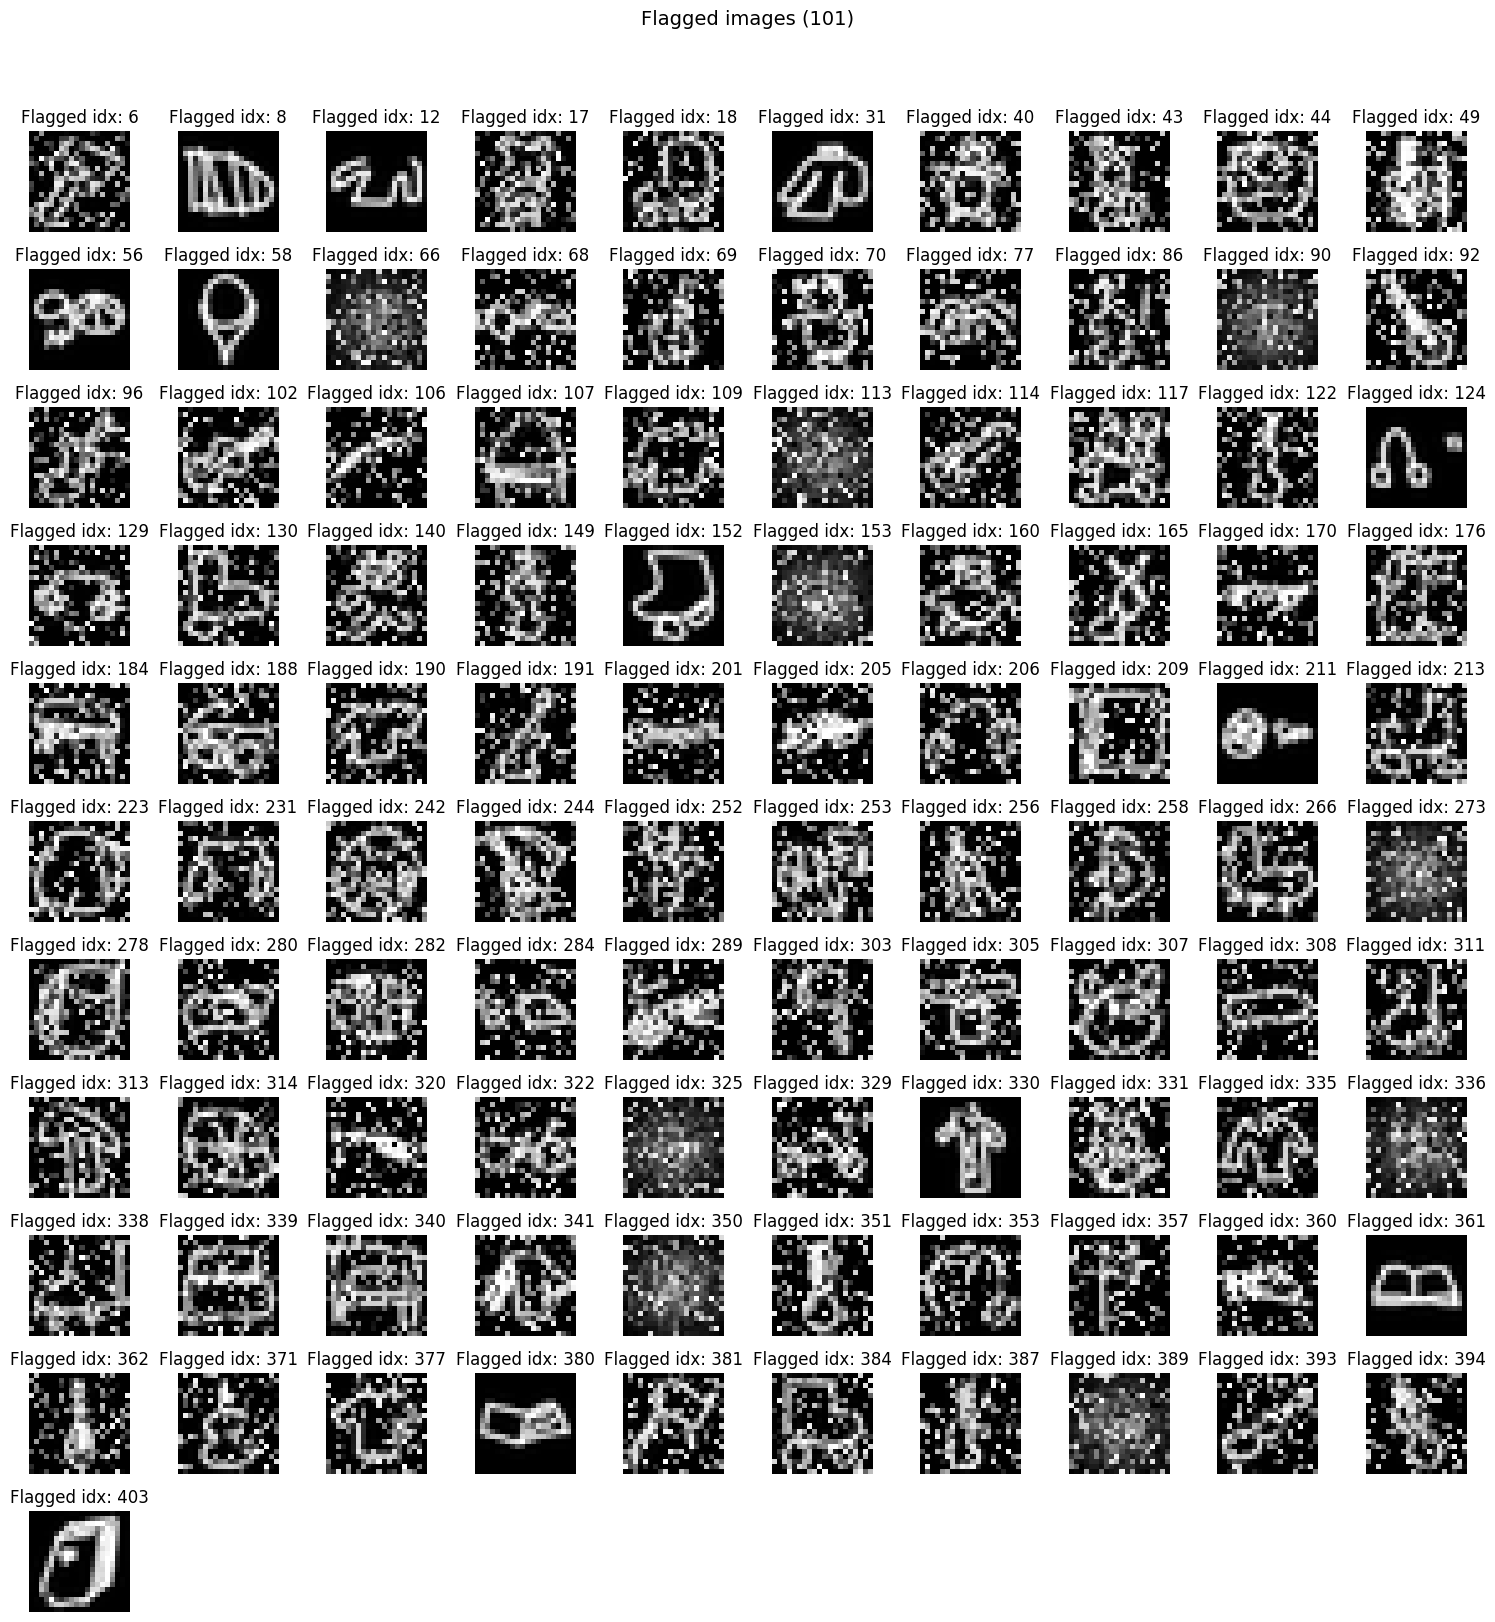

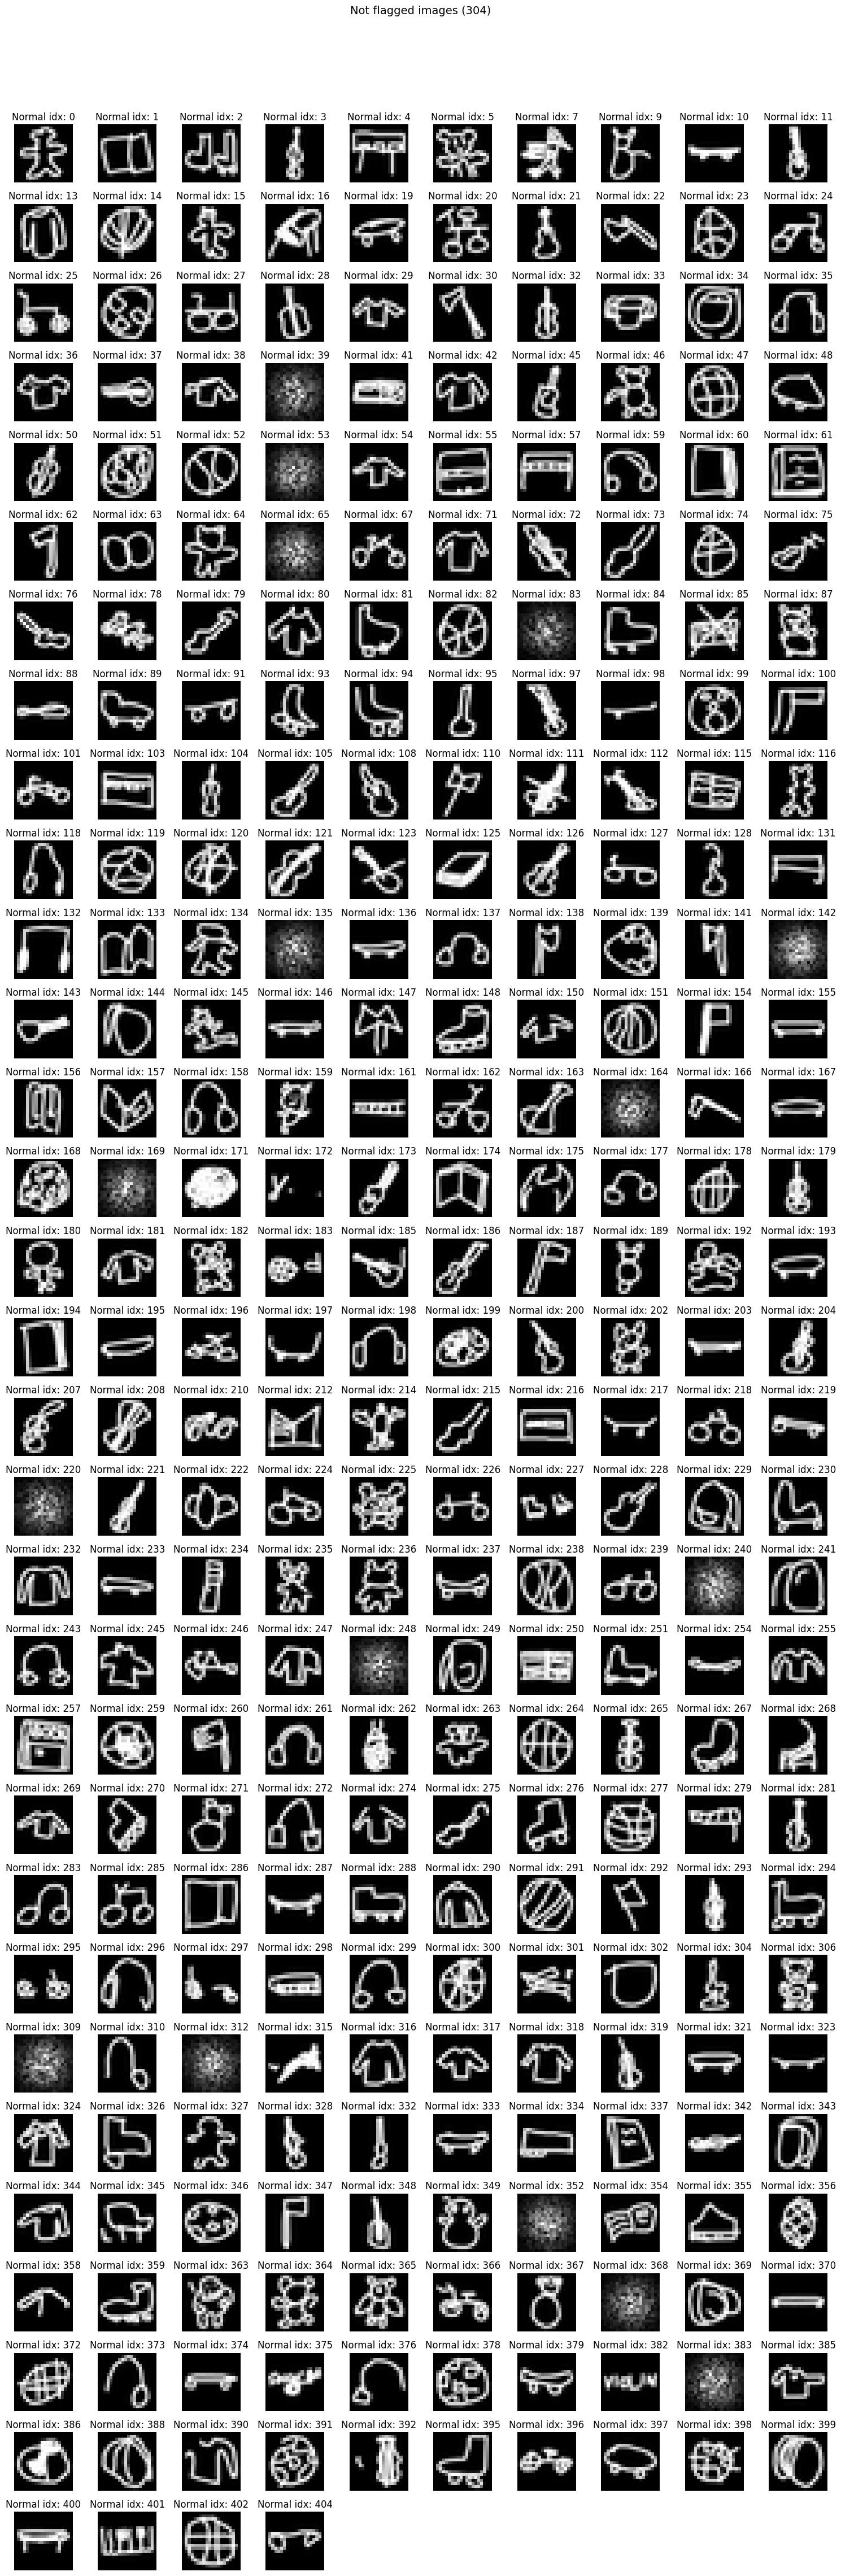

In [80]:
visualize_flags(flag_svm, X_corrupted, show_not_flagged=True)

=== Combined threshold ===

In [81]:
combined_score = 0.5 * (svm_score_corr / svm_score_corr.max()) + 0.5 * (1 / (1 + recon_pca))
threshold_comb = np.percentile(combined_score, 22)
flag_combined = combined_score <= threshold_comb

print(f"Threshold combined: {threshold_comb:.4f}")
print(f"Flagged combined: {flag_combined.sum()} / {len(flag_combined)}")

Threshold combined: 0.6176
Flagged combined: 89 / 405


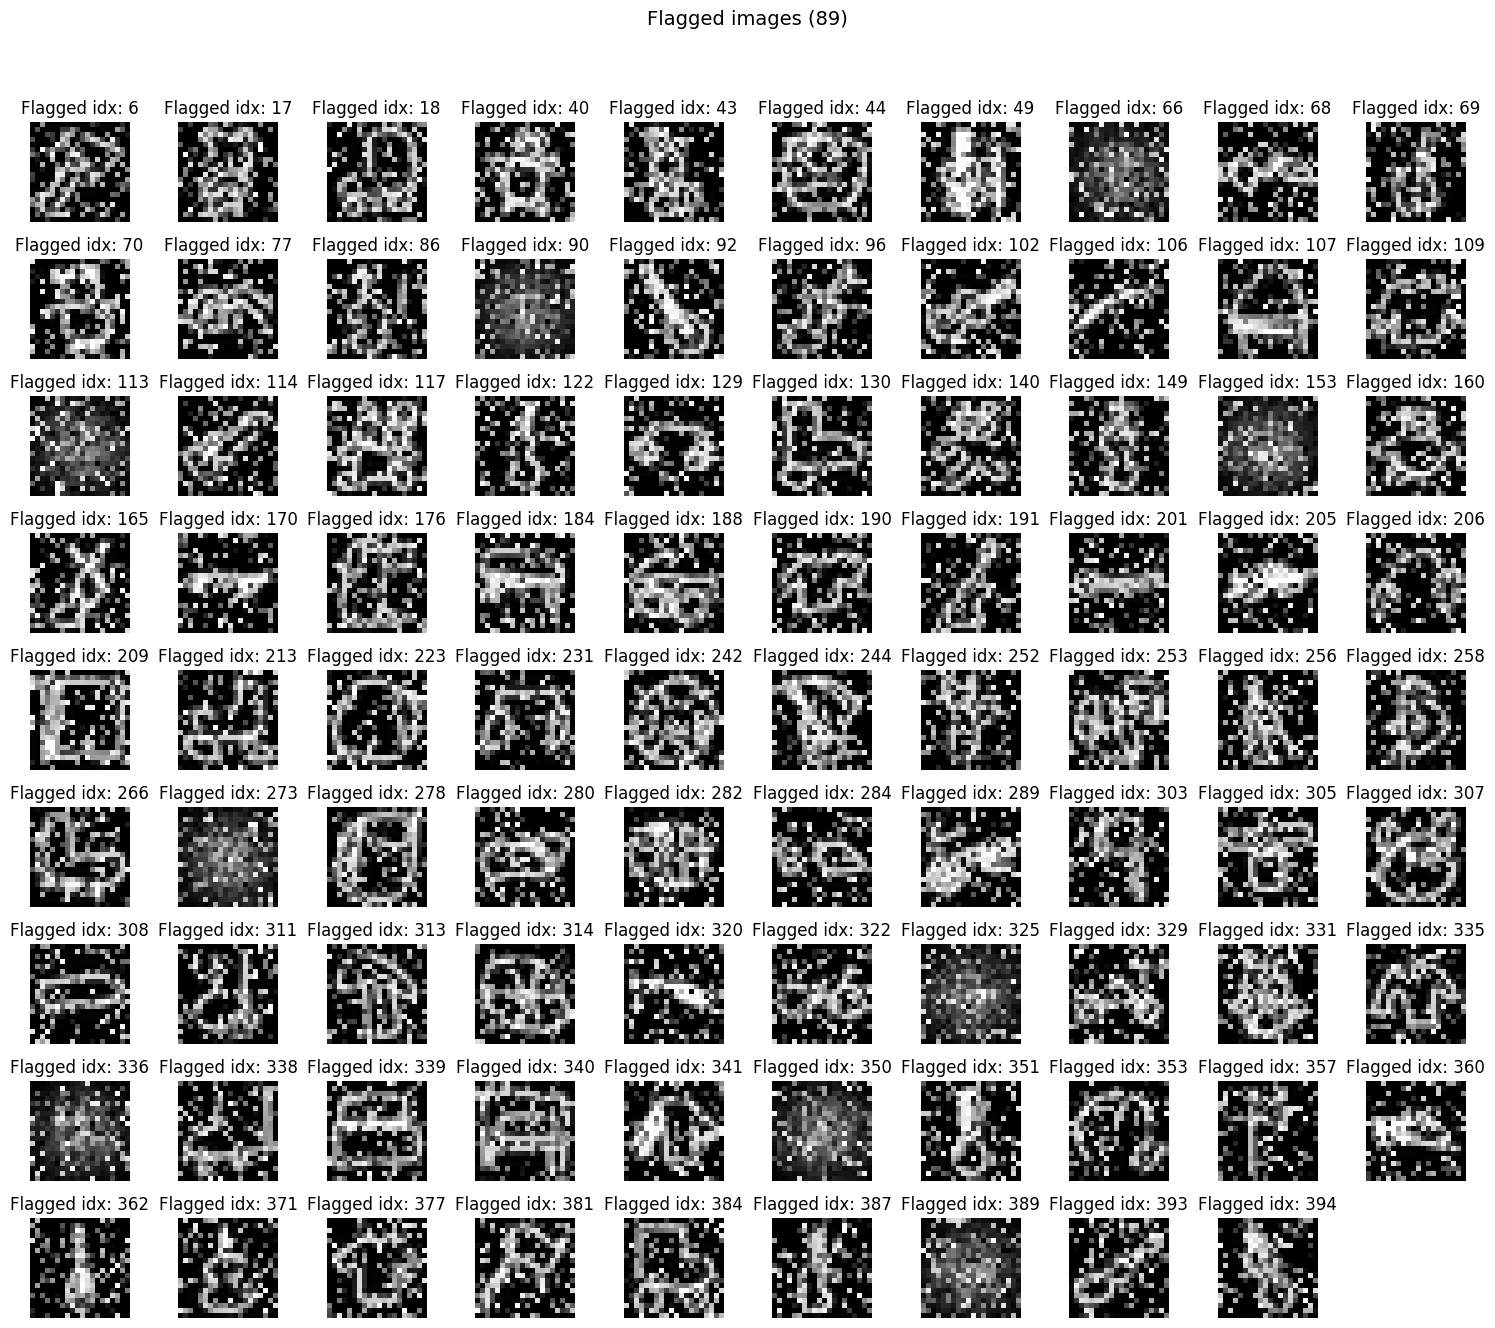

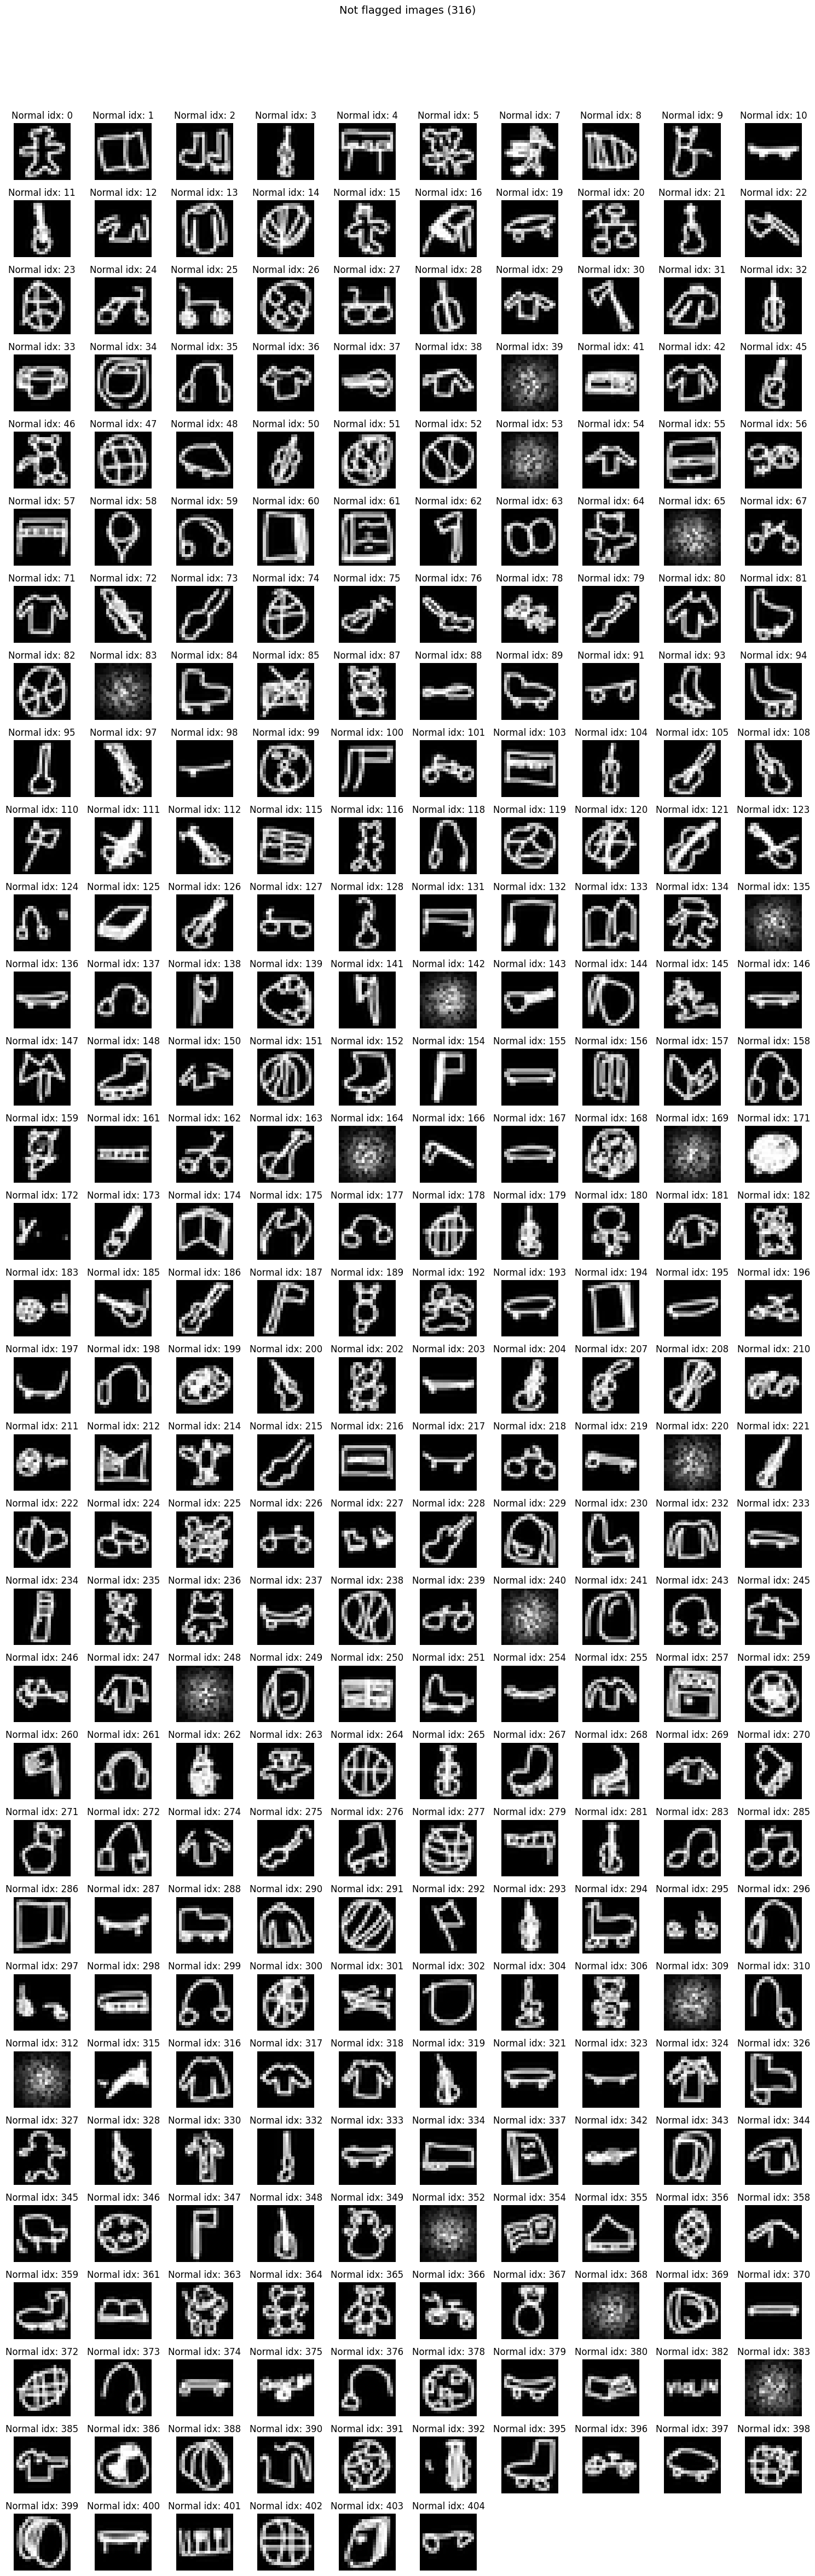

In [82]:
visualize_flags(flag_combined, X_corrupted, show_not_flagged=True)